In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# from IPython.display import Audio
# sound_file = './beep.wav'

# Guh fine, I think this is annoying
%pylab inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# based on http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

# from sklearn.datasets import fetch_20newsgroups
# categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
# newsgroups = fetch_20newsgroups(subset="train", categories=categories)
# newsgroups.target
# vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [3]:
# these make more sense when we're seperating by just one line break
def single_line_filter(temp):
    temp = [k for k in temp if k.count("@") < 2]
    temp = [k for k in temp if k.count(";") < 2]
    temp = [k for k in temp if not k.startswith('Sent')]
    temp = [k for k in temp if not k.startswith('From')]
    temp = [k for k in temp if not k.startswith('To')]
    temp = [k for k in temp if not k[0].isdigit()]
    temp = [k for k in temp if not k[1].isdigit()]
    return temp

In [63]:
emails_file = open('Produce-1600-2541-Redacted.txt')
emails = emails_file.read()
# email_lines = emails.split('\n')
# email_lines = emails.split('\n\n')
email_lines = emails.split('From:')

len(email_lines)
# 5102 with '\n\n' and then 2761 post filters
# 5102 with '\n\n' and then 3580 post commenting out single-line filters

675

In [64]:
# single_line_filter(email_lines[].split('\n'))

temp = [k for k in email_lines if len(k) > 5]
temp = [k for k in temp if k.count(" ") > 5]
email_lines = temp
# len(temp)

In [65]:
tfidv = TfidfVectorizer()
vectors = tfidv.fit_transform(email_lines)

In [66]:
# print(repr(vectors))
# tfidv.get_feature_names()
len(email_lines)

672

In [67]:
from sklearn.decomposition import TruncatedSVD
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [68]:

X_embedded = TSNE(n_components=3, perplexity=40, verbose=2).fit_transform(X_reduced)
# X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 672 / 672
[t-SNE] Mean sigma: 0.417230
[t-SNE] Iteration 25: error = 0.7772002, gradient norm = 0.0170231
[t-SNE] Iteration 50: error = 0.6216612, gradient norm = 0.0173538
[t-SNE] Iteration 75: error = 0.4631742, gradient norm = 0.0105315
[t-SNE] Iteration 100: error = 0.1632024, gradient norm = 0.0012516
[t-SNE] Error after 100 iterations with early exaggeration: 0.163202
[t-SNE] Iteration 125: error = 0.0691251, gradient norm = 0.0005835
[t-SNE] Iteration 125: gradient norm 0.000583. Finished.
[t-SNE] Error after 125 iterations: 0.069125


In [69]:
X_embedded_as_list = X_embedded.tolist()
X_embedded[0]


array([ 12.48349257,   3.55453891,   1.59069459])

In [70]:
wrap_at = 60 #30
from textwrap import wrap
def add_breaks(t):
    return "\n".join(wrap(t, wrap_at))

# add_breaks(email_lines[0])
email_lines_with_breaks = [add_breaks(e) for e in email_lines]
# email_lines_with_breaks[0]


In [71]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 15
cmap=plt.get_cmap('viridis')
cmap
print(X_embedded_as_list[0])
print(X_embedded_as_list[1])
print(' ')
X_embedded[:,2]

[12.48349256765584, 3.554538911260568, 1.5906945899695064]
[6.478511183698104, 11.481418040421536, -10.54228593952683]
 


array([  1.59069459, -10.54228594, -12.41504038, -15.39269253,
       -12.70590753, -15.00297949,   0.53170757, -10.32838701,
       -15.77098817, -12.35518123, -10.49407818, -14.90929768,
        -9.88858963, -14.68715518, -15.2646108 , -12.10163175,
       -12.8066537 , -12.9666694 , -13.03343536,  -3.86797257,
        -8.10204275,  -8.75631332, -10.69158144,  -6.4731878 ,
         1.19818835, -13.49786879,   5.66663786,  -8.87459559,
        -9.53699507, -13.36166458,  -3.83240254,   0.07006133,
       -15.04441767,  10.18845524,  -7.77844493,  -7.57798334,
       -12.92560827,  -8.12017681,  -2.95799795, -13.29183877,
         6.53006975,  -7.10854712, -11.00155381,  -3.56981584,
        -3.85199862, -12.25674743,   5.26997044, -12.15948902,
        -6.02899568,  -1.09668004, -11.36482782,   6.66919833,
        -6.57008177,  -6.19557783,  -1.55094886, -10.71838897,
         3.91957212,  -3.54629004,   8.52896379,  11.69540793,
       -11.13113078,  31.71067947,  11.06526695,  11.86

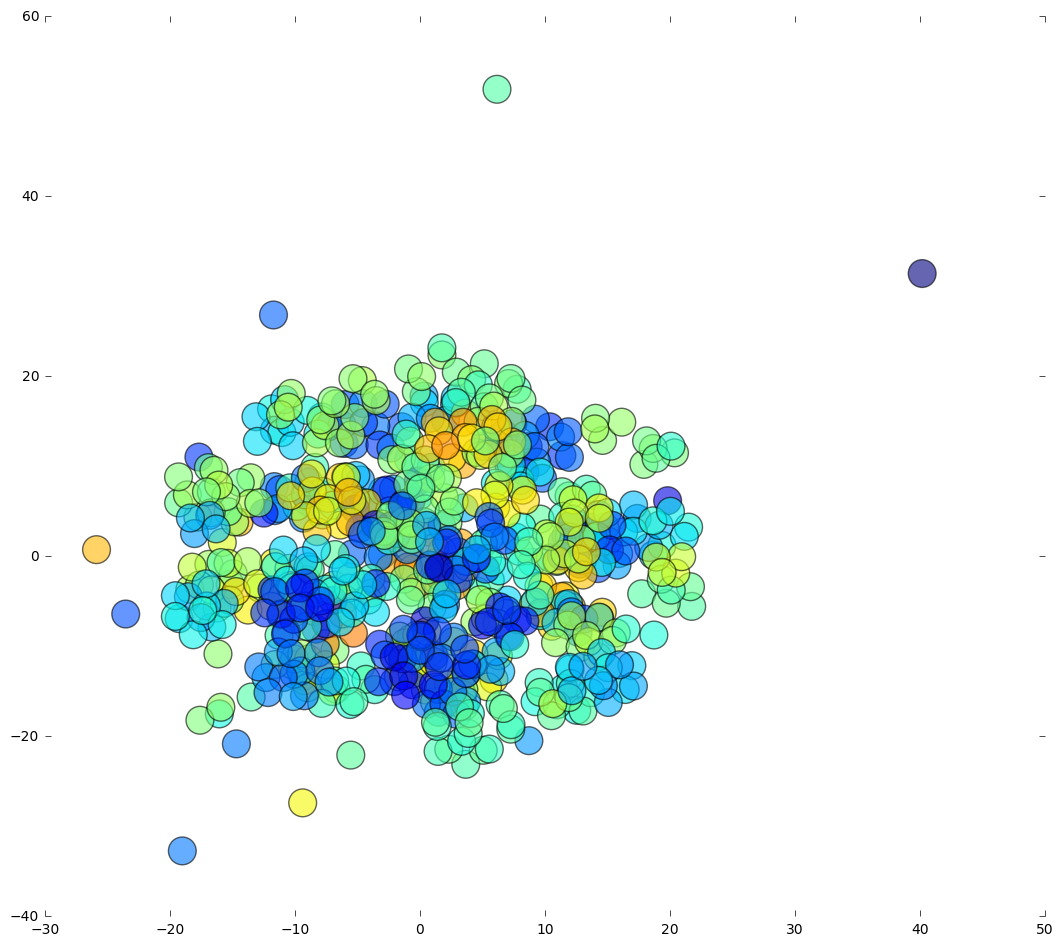

In [72]:
fig = figure(figsize=(10, 10))
# fig = figure(figsize=(100, 100))
# fig = figure(figsize=(20, 20))

ax = axes(frameon=False)
# setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=400, alpha=0.6)
# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=5000, alpha=0.01, lw=0)

# plt.axis([-10, 10, -10, 10])

# for text!
# for i, txt in enumerate(email_lines_with_breaks):
#     ax.annotate(txt, (X_embedded[i][0], X_embedded[i][1]), size=6, wrap=True, ha="center", va="center", alpha=0.9,)
#     bbox={'facecolor': 'white', 'alpha': 0.01}).set_zorder(0)
    
#                 bbox={'alpha': 0.2, 'boxstyle':'round' })
#                 bbox={'facecolor':X_embedded[i][2], 'pad':1, 'alpha': 0.2, 'boxstyle':'round' })

# Audio(url=sound_file, autoplay=True)

In [73]:
data = {"X_embedded":X_embedded_as_list, "email_lines":email_lines}
import json
with open('email_plot_data_3.json', 'w') as fp:
    json.dump(data, fp)